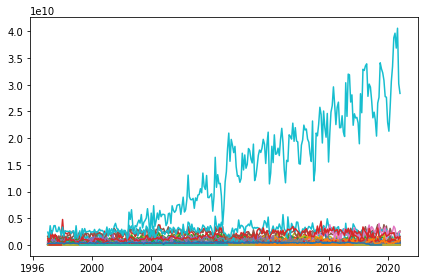

In [78]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
filename = "./data/EXP_COMPLETA_MUN.csv"
chunksize = 10 ** 6

def process(chunk):
  return chunk
frames = []
with pd.read_csv(filename, sep=";" ,chunksize=chunksize, squeeze=True) as reader:
    for chunk in reader:
        frames.append(process(chunk))
df = pd.concat(frames).groupby(['CO_ANO', 'CO_MES', 'CO_PAIS']).agg('sum').reset_index()
df['Date'] = pd.to_datetime(df.CO_ANO.astype(str) + '/' + df.CO_MES.astype(str) + '/01')
for label, df1 in df.groupby('CO_PAIS'):
  plt.plot(df1.Date, df1.KG_LIQUIDO, label=label)
plt.tight_layout()
plt.show()